### Regression :  to predict continous numerical value.
### Classification : to predict categorical type data means Y/N or  T/F or 1/0.

### Python Programming / R Programming 

###  If use Python : knowledge of python 's tools / library.
### 1.) NumPy
### 2.) Pandas
### 3.) Matplotlib
### 4.) Seaborn
### 5.) sklearn 
### 6.) Scipy

### Pandas library is a data analysis tool used for data manipulation, Numpy for scientific computing and Matplotlib & Seaborn for data visualization.

### Statistics knowledge : mean, mode, median, skeweness, normal distribution,
### standard deviation, variance
### Linear Algebra
### Probability.

# EDA(Exploratory data analysis) - Preprocessing

steps of EDA (Exploratory data analysis)
 
     To clean Data before feed the data in computer.

        1.) Handle Missing values.
        2.) Handling outliers.
        3.) Handling skeweness.
        4.) Handling Categorical Data.
        5.) Feature Engineering.

In [1]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

# 1.) Missing Values

#### Create a DataFrame

In [2]:
# To Generate the null values
np.nan

nan

In [3]:
name=['Kamal','John','Siya','Sunita','Anirudh']
# if we put the speical character "-",zeros'0' instead of null, 
# then it will convert the list as string format.
math=[89,78,67,np.nan,85] 
science=[78,75,np.nan,np.nan,76]

#### Create a dictionary with the help of above list

In [4]:
dic={'Name':name,'Math':math,'Science':science}
dic

{'Name': ['Kamal', 'John', 'Siya', 'Sunita', 'Anirudh'],
 'Math': [89, 78, 67, nan, 85],
 'Science': [78, 75, nan, nan, 76]}

#### Create a DataFrame from Dictionary

In [5]:
df=pd.DataFrame(dic)
df

,Name,Math,Science
0,Kamal,89.0,78.0
1,John,78.0,75.0
2,Siya,67.0,NaN
3,Sunita,NaN,NaN
4,Anirudh,85.0,76.0


#### Check null values if existing dataframe df : use inbuilt method " isnull() "

In [6]:
df.isnull()

,Name,Math,Science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


#### Find number of null values in each column.

In [7]:
df.isnull().sum()

Name       0
Math       1
Science    2
dtype: int64

#### Dropna() : To delete those rows whose found null but remove temporary from DataFrame

In [8]:
df.dropna()    # axis is not define then top to buttom row vise, 
               # by default axis=0

,Name,Math,Science
0,Kamal,89.0,78.0
1,John,78.0,75.0
4,Anirudh,85.0,76.0


#### To delete those columns whose found null values but temporary remove 

In [9]:
df.dropna(axis=1)  # axis is define as 1 then row vise delete the columns from left to right.

,Name
0,Kamal
1,John
2,Siya
3,Sunita
4,Anirudh


#### To delete the 3rd row Because Maximum null values occurs in this row, but temporary.

In [10]:
df.drop(3)  # DataFrame.drop(row_index)

,Name,Math,Science
0,Kamal,89.0,78.0
1,John,78.0,75.0
2,Siya,67.0,NaN
4,Anirudh,85.0,76.0


#### To delete the science columns Because Maximum null values occurs in this column, but temporary.

In [11]:
# Always use axis=1 when deleting the columns because by default its axis=0.
df.drop(['Science'],axis=1)

,Name,Math
0,Kamal,89.0
1,John,78.0
2,Siya,67.0
3,Sunita,NaN
4,Anirudh,85.0


#### How many row and columns in dataset?


In [12]:
df.shape  #(first = No.of rows, Second = No. of columns)

(5, 3)

#### How many rows in given dataset?


In [13]:
df.shape[0]

5

#### How many columns in given dataset?

In [14]:
df.shape[1]

3

#### Find the Percentage of null values in column
percent= 100*(len(df.loc[:,df.isnull().sum(axis=0)>=1 ].index) / len(df.index))

In [15]:
percent=100*(df.isnull().sum()/df.shape[0])
print(percent)  # We decided not to delete the columns because its less 40%

Name        0.0
Math       20.0
Science    40.0
dtype: float64


#### Replacing NULL values
         
         Replacing means fill all null values with 0,. but its temporary.

In [16]:
df.fillna(0) # replace null values with 0.

,Name,Math,Science
0,Kamal,89.0,78.0
1,John,78.0,75.0
2,Siya,67.0,0.0
3,Sunita,0.0,0.0
4,Anirudh,85.0,76.0


#### Replace null values of math column with average/mean of maths permanently
         
      First find mean of Math column

In [17]:
m=df['Math'].mean() # inbuilt function
print("Mean of Math colummn: ",m)

Mean of Math colummn:  79.75


#### Permanent fill of null values of math with mean value of math column.

        inplace acts as Permanently Changes
        df['Math'].fillna(m,inplace=True)

In [18]:
df['Math'].fillna(m)

0    89.00
1    78.00
2    67.00
3    79.75
4    85.00
Name: Math, dtype: float64

#### Replace null values of math column with average/mean of Science permanently
         
      First find mean of Science column

In [19]:
m=round(df['Science'].mean(),2)
print('Mean of Science Column : ',m)

Mean of Science Column :  76.33


In [20]:
df['Science'].fillna(m) # Temporary

0    78.00
1    75.00
2    76.33
3    76.33
4    76.00
Name: Science, dtype: float64

#### Work on Real Dataset Automobile_data.csv
#####         To Load dataset

In [21]:
car=pd.read_csv("Automobile_data.csv")

In [22]:
# First five records.
car.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [23]:
car.shape

(205, 15)

#### TO check the Missing Values in given Dataset

In [24]:
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [26]:
for data in car['horsepower']:
    if not(str(data).isnumeric()):
        print(data)

?
?


<AxesSubplot:>

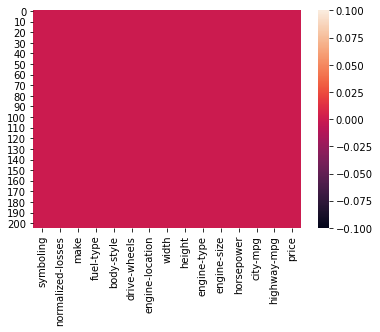

In [27]:
sns.heatmap(car.isnull())

In [28]:
car['horsepower'].replace("?",np.nan,inplace=True) # by defaulcts it take the axis=1

<AxesSubplot:>

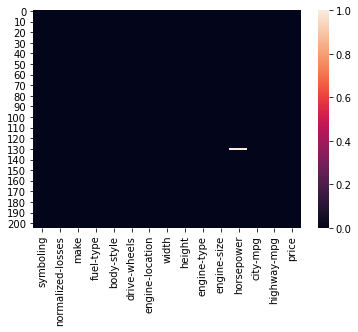

In [29]:
sns.heatmap(car.isnull())

In [30]:
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


#### To show particular data type of column

In [32]:
car['horsepower'].dtype

dtype('O')

##### To change data type of particular column from object to float and its the permanent change

In [33]:
car['horsepower']=car['horsepower'].astype('float')

In [34]:
car['horsepower'].dtype

dtype('float64')

#### To check how many percent null values in the columns ' horsepower ', if its greater than 40% then we drop the null value with the mean () and if its less 40% then we replace the column with mean   the particular column from the dataset

In [35]:
car['horsepower'].isnull().sum()*100/car.shape[0]

0.975609756097561

#### To replace null values of horsepower column with mean of horsepower column permanently
#### Find mean/Average of horsepower column

In [36]:
m=car['horsepower'].mean()
car['horsepower'].fillna(m,inplace=True)

In [37]:
# Check the null values
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Similar process apply of normalized losses column

In [38]:
for data in car['normalized-losses']:
    if not(str(data).isnumeric()):
        print(data)

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


In [39]:
car['normalized-losses'].replace("?",np.nan,inplace=True)

In [40]:
car['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

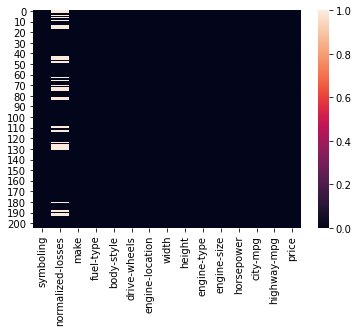

In [41]:
sns.heatmap(car.isnull())
plt.show()

In [42]:
car['normalized-losses'].value_counts()

161    11
91      8
150     7
134     6
104     6
128     6
65      5
102     5
85      5
103     5
168     5
95      5
94      5
74      5
122     4
148     4
118     4
93      4
106     4
154     3
137     3
115     3
101     3
83      3
125     3
194     2
192     2
188     2
158     2
129     2
81      2
153     2
164     2
197     2
89      2
87      2
110     2
119     2
108     2
145     2
113     2
142     1
186     1
78      1
90      1
107     1
256     1
77      1
231     1
121     1
98      1
Name: normalized-losses, dtype: int64

In [43]:
car['normalized-losses'].dtype

dtype('O')

#### To change data type of particular column from object to float and its the permanent change

In [44]:
car['normalized-losses']=car['normalized-losses'].astype('float')

In [45]:
car['normalized-losses'].isnull().sum()*100/car.shape[0]

20.0

#### To replace null values of horsepower column with mean of horsepower column permanently
#### Find mean/Average of horsepower column

In [46]:
m=car['normalized-losses'].mean()
car['normalized-losses'].fillna(m,inplace=True)

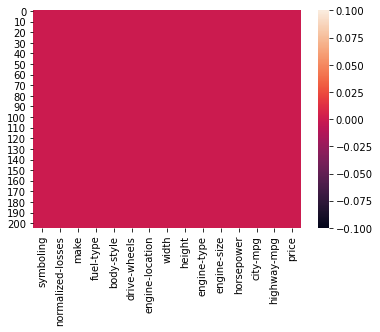

In [47]:
sns.heatmap(car.isnull())
plt.show()

#### To convert the columns in to the list 

In [48]:
columns=car.columns
columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

#### show all the unique values in the columns in one ser of program

In [49]:
for col in columns:
    print(col)
    print(car[col].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized-losses
[122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
width
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 

# 2.) Outlier
#### Handle of Outlier
#### Lower Whisker  <= Data_values <= Upper Whisker
## Step of find outliers
    1.) Arrange the data in order from lowest to highest and  find Q1 and Q3
      a.) Q1 = (N+1)/4th term
      b.) Q3 = (N+1) * 3/4 th term
    
    2.) Find the interquartile range (IQR = Q3 - Q1)
    3.) Lower Whisker = Q1 - 1.5 * IQR (Smaller than Lower Whisker, consider as outlier)
    4.) Upper Whisker = Q3 + 1.5 * IQR (Large than Upper Whisker,consider as outlier)

In [50]:
L=[9,9,10,10,10,11,12,36] #Create the list

In [51]:
df=pd.Series(L) # to change the list into 1D array :- Series

In [52]:
print(df)

0     9
1     9
2    10
3    10
4    10
5    11
6    12
7    36
dtype: int64


In [53]:
#Find Outlier
Q1=df.quantile(0.25)   # Frist Quantile : 25% means (N+1)*25% th terms
Q3=df.quantile(0.75)   # Third Quantile : 75% means (N+1)*75% th terms
# Find InterQuantile Range
IQR=Q3-Q1  #Inter-Qunatlie Range
print('First Quantile : ',Q1)
print('Third Quantile : ',Q3)
print("InterQuantile Range : ",IQR)
Lower_Whisker=Q1-1.5*IQR
Upper_Whisker=Q3+1.5*IQR
print('Lower Whisker: ',Lower_Whisker,'\n Upper Whisker: ',Upper_Whisker)

First Quantile :  9.75
Third Quantile :  11.25
InterQuantile Range :  1.5
Lower Whisker:  7.5 
 Upper Whisker:  13.5


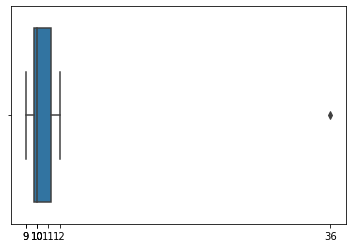

In [54]:
sns.boxplot(data=df,x=df)
plt.xticks(df)
plt.show()

### Access those records whose  > 12

In [55]:
df[df>12]

7    36
dtype: int64

#### Delete records no. 7 which is outlier

In [56]:
df.drop(7,inplace=True)

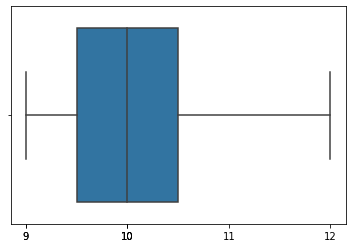

In [57]:
sns.boxplot(data=df,x=df)
plt.xticks(df)
plt.show()

### Now finding the outlier in the Automobile_dataset.csv

In [58]:
# We check outlier on target variable means output variable (numerical Type)
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

#### To check the outlier

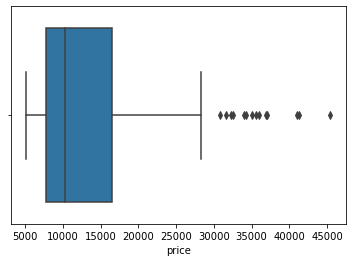

In [59]:

sns.boxplot(data=car,x='price')  # Here price is target variable means output Variable
plt.show()

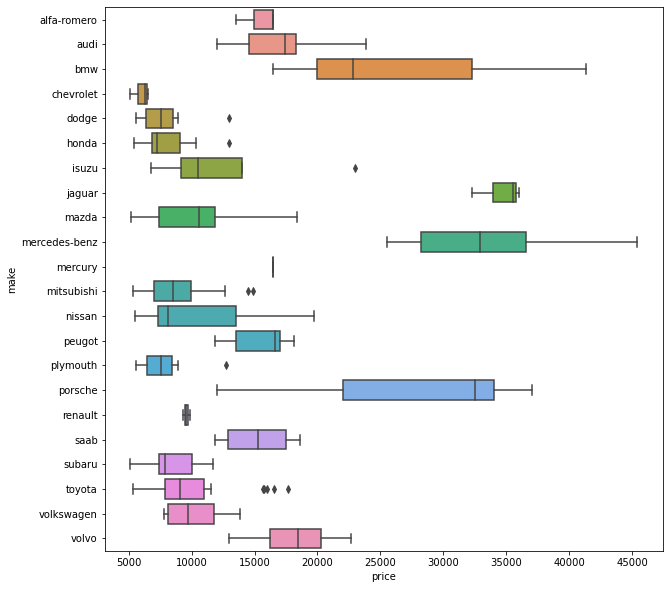

In [60]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

In [61]:
car[(car['make']=='isuzu') & (car['price']>=20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [62]:
# to remove the records no.45 permanently from the dataset
car.drop(45,inplace=True)

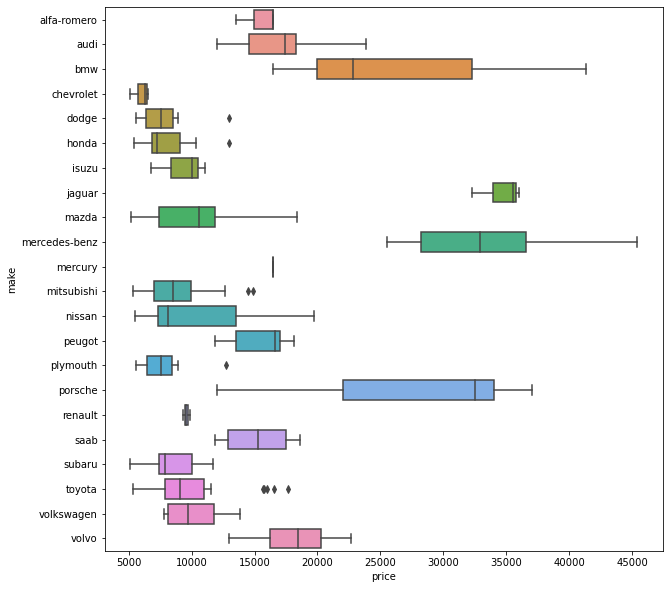

In [63]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

### Toyota Outlier 

In [64]:
car[(car['make']=='toyota') & (car['price']>=12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [65]:
car.drop([172,178,179,180,181],inplace=True)

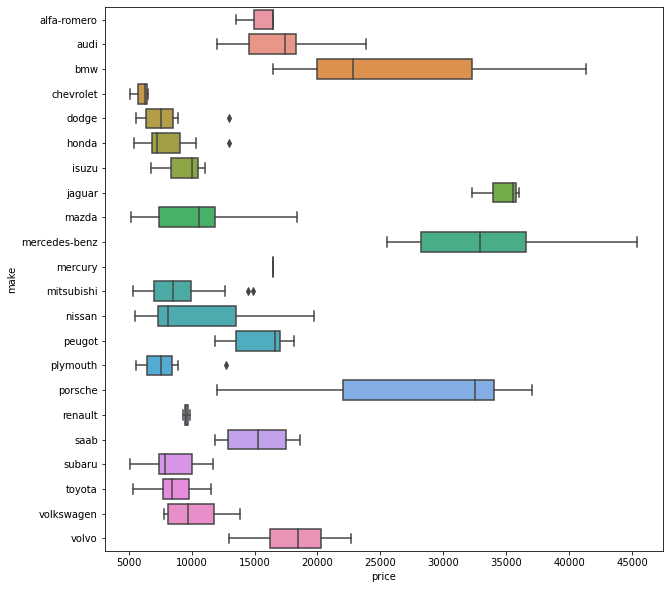

In [66]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

## Plymoth Outlier 

In [67]:
car[(car['make']=='plymouth') & (car['price']>=10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [68]:
car.drop(124,inplace=True)

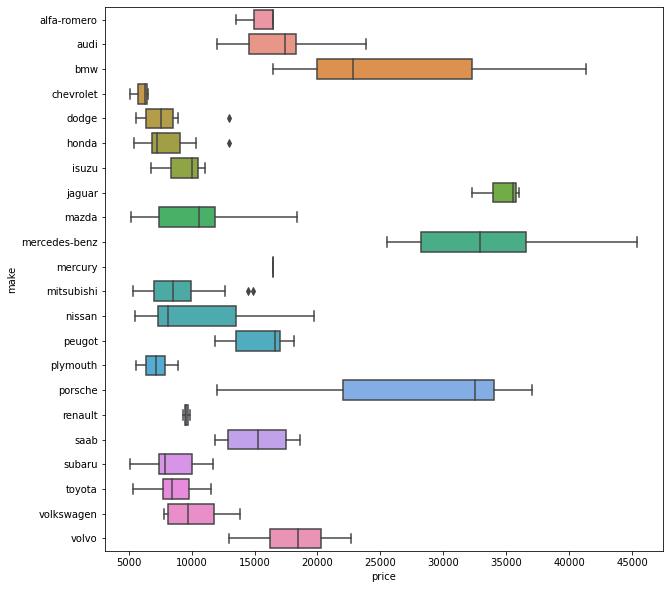

In [69]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

## Mitsubishi Outlier 

In [70]:
car[(car['make']=='mitsubishi') & (car['price']>=11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
82,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12629
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [71]:
car.drop([82,83,84],inplace=True)

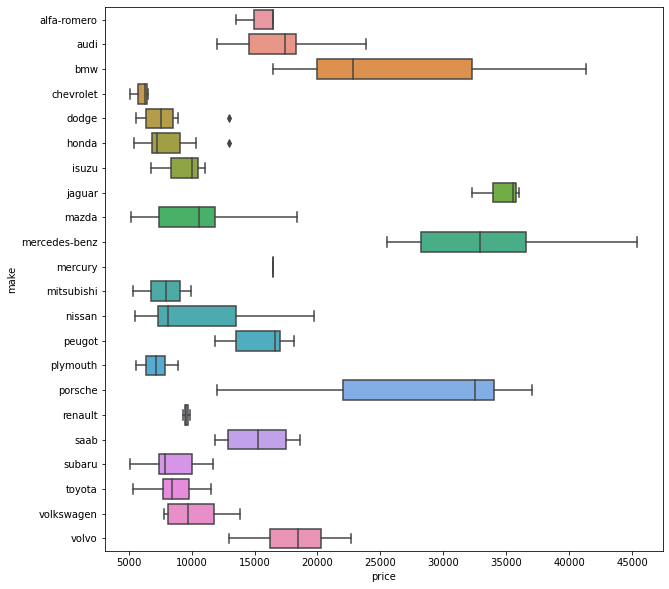

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

In [73]:
car[(car['make']=='dodge') & (car['price']>=11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [74]:
car.drop(29,inplace=True)

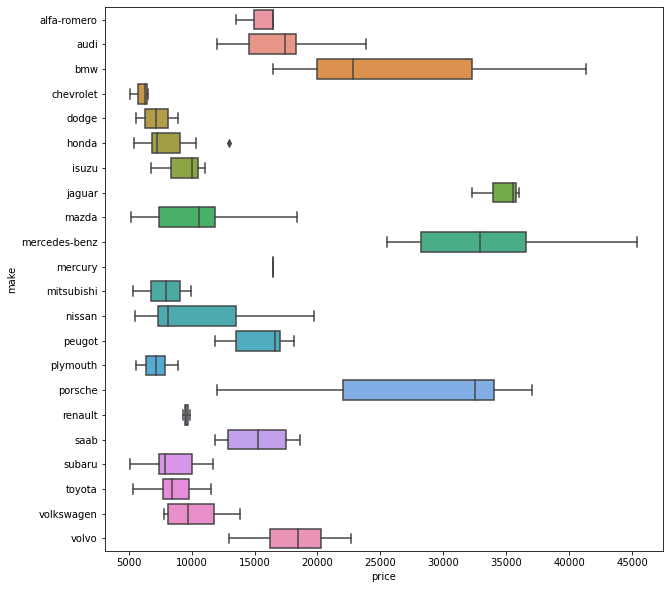

In [75]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

In [76]:
car[(car['make']=='honda') & (car['price']>=11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [77]:
car.drop(41,inplace=True)

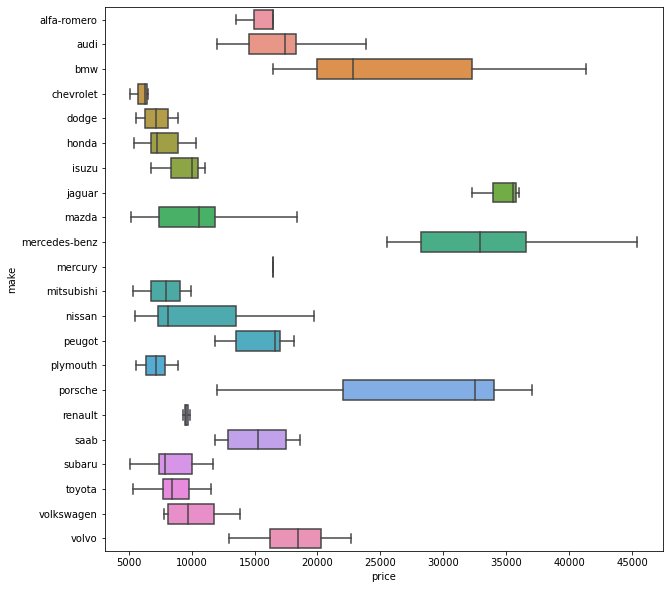

In [78]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,x='price',y='make')  # Here price is target variable means output Variable
plt.show()

# step 3 : Cleaning

### Handle Categorical  Data;
       Categorical Data means Non-NUmerical data means object type data means string type.
       Machne already understand only numerical data, not understand categorical data means
       Non-numeric data means string type object type now we converts categorical  data to 
       numercial data how do this

In [79]:
# There are 2 types of methods use to 
# Numerical type
# 1. One-Hot Encoding        2. Label Encoding

In [80]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   body-style         193 non-null    object 
 5   drive-wheels       193 non-null    object 
 6   engine-location    193 non-null    object 
 7   width              193 non-null    float64
 8   height             193 non-null    float64
 9   engine-type        193 non-null    object 
 10  engine-size        193 non-null    int64  
 11  horsepower         193 non-null    float64
 12  city-mpg           193 non-null    int64  
 13  highway-mpg        193 non-null    int64  
 14  price              193 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 28.2+ KB


### 1. One-Hot Encoding
         Apply one hot encoding on fuel-type column : temperory change
         get_dumies() inbuilt methods of pandas

In [81]:
 pd.get_dummies(car['fuel-type'])  # Convert value of the fuel-type from object to numeric type but temporary

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


###  2.)Label Encoding : It is second methods of the numeric categorical type data
    First call label Encoder inbuilt class from sklearn, preprocessing 

In [82]:
from sklearn.preprocessing  import LabelEncoder
# From filename.classname import classname

In [83]:
# Create object of LabelEncoder class
le=LabelEncoder()
le.fit_transform(car['fuel-type'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [84]:
# Create object of LabelEncoder class
le=LabelEncoder()
le.fit_transform(car['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21])

In [85]:
car['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Split the data type from the above table 
    Seperate the numercial data (int and float) and categorical data(object type)
    First create dataframe name car_cat which hold object type data means categorical data

In [86]:
car_cat= car.select_dtypes(object)
#Here car_cat is a new dataframe for categorical type data
car_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             193 non-null    object
 1   fuel-type        193 non-null    object
 2   body-style       193 non-null    object
 3   drive-wheels     193 non-null    object
 4   engine-location  193 non-null    object
 5   engine-type      193 non-null    object
dtypes: object(6)
memory usage: 14.6+ KB


In [87]:
# Then create second dataframe name car_num which hold int and float type data means numerical data
car_num=car.select_dtypes(['int64','float64'])
car_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   width              193 non-null    float64
 3   height             193 non-null    float64
 4   engine-size        193 non-null    int64  
 5   horsepower         193 non-null    float64
 6   city-mpg           193 non-null    int64  
 7   highway-mpg        193 non-null    int64  
 8   price              193 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 19.1 KB


In [88]:
# Here all categorical type data converts into numeric type
for col in car_cat:
    # Create obejct of LabelEncoder class
    le=LabelEncoder()
    car_cat[col]=le.fit_transform(car_cat[col])

In [89]:
car_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   make             193 non-null    int32
 1   fuel-type        193 non-null    int32
 2   body-style       193 non-null    int32
 3   drive-wheels     193 non-null    int32
 4   engine-location  193 non-null    int32
 5   engine-type      193 non-null    int32
dtypes: int32(6)
memory usage: 10.1 KB


###  Step 4.) Hnadling skewness
    formula : skewness SUM(X-mean)**3/N
### Skewness types 
    1.) Positive       2.) Negative
#### If mean,median and mode all are same ,then its known as skewness.

In [90]:
#Normal Distribution means  data are Equally distributed on both sides
#Normal Distribution curve is apply only numeric type data
#Normal Distribution is also a frequency curve .
#for Normal Distribution curve : use inbuilt method distplot()and histplot :
#distplot()/histplot() inbuilt method of seaborn library
#sns.distplot(columnname) columnname should be numeric

In [91]:
car_num.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [92]:
# Find skewness : use inbuilt method skew() : call inbuilt module 
# To check the skewness value in each and every numerical column 
for col in car_num:
    print('Skewness of column {} : {}'.format(col,car_num[col].skew()))

Skewness of column symboling : 0.2164328257301786
Skewness of column normalized-losses : 0.8529589096850014
Skewness of column width : 0.9219710534705245
Skewness of column height : 0.00804949114390977
Skewness of column engine-size : 2.0827139128099392
Skewness of column horsepower : 1.5885868417887317
Skewness of column city-mpg : 0.5971659062531333
Skewness of column highway-mpg : 0.4719670300837074
Skewness of column price : 1.8253731777872693


Skewness of column symboling : 0.2164328257301786
Histogram: symboling


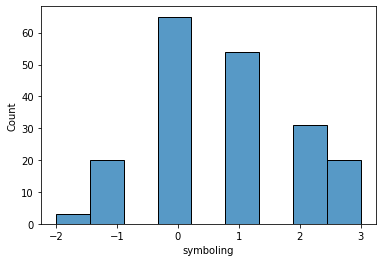

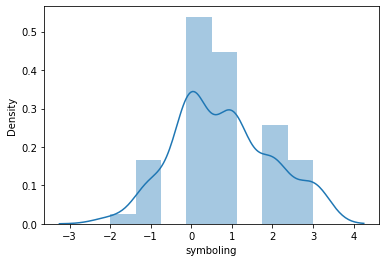

Skewness of column normalized-losses : 0.8529589096850014
Histogram: normalized-losses


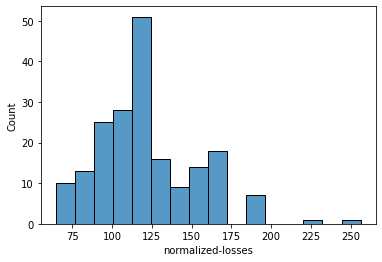

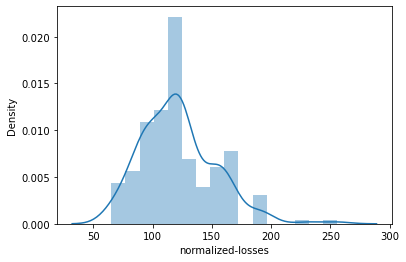

Skewness of column width : 0.9219710534705245
Histogram: width


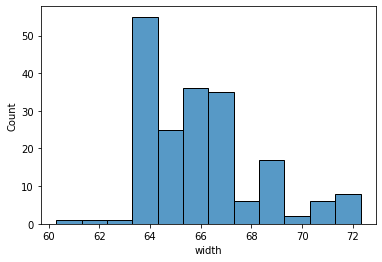

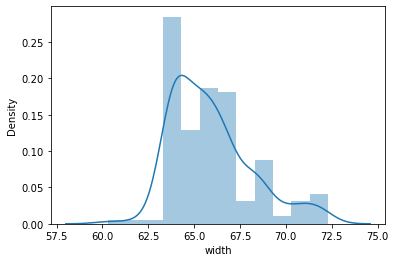

Skewness of column height : 0.00804949114390977
Histogram: height


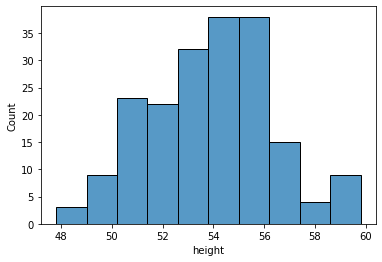

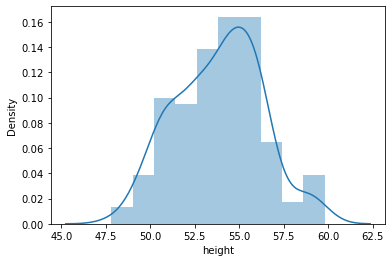

Skewness of column engine-size : 2.0827139128099392
Histogram: engine-size


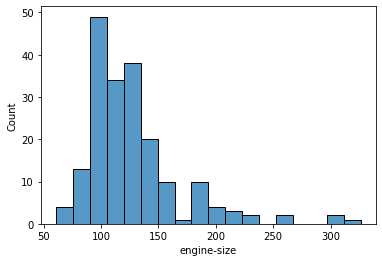

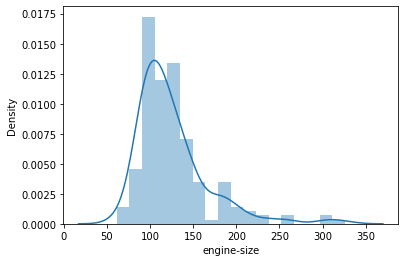

Skewness of column horsepower : 1.5885868417887317
Histogram: horsepower


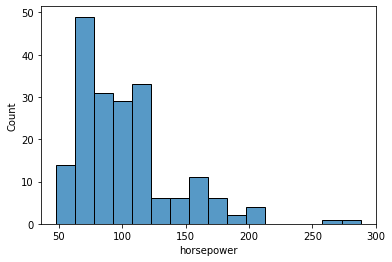

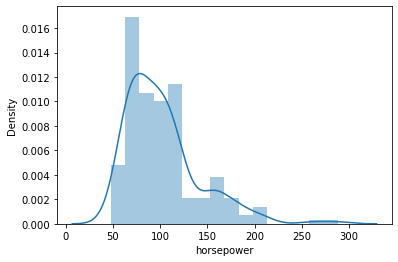

Skewness of column city-mpg : 0.5971659062531333
Histogram: city-mpg


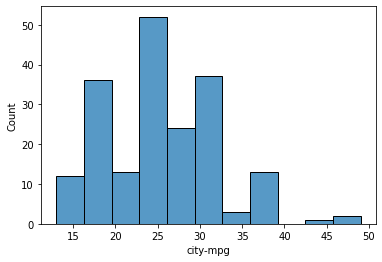

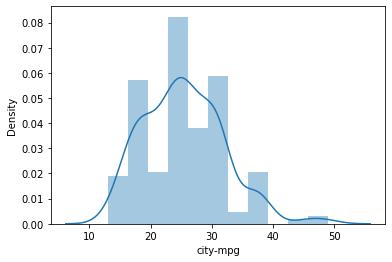

Skewness of column highway-mpg : 0.4719670300837074
Histogram: highway-mpg


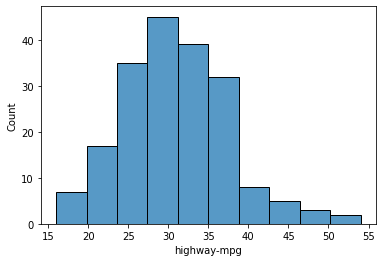

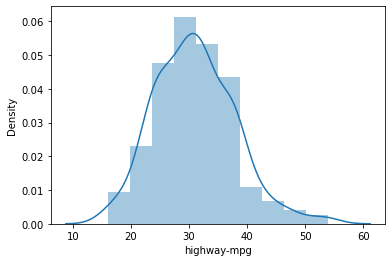

Skewness of column price : 1.8253731777872693
Histogram: price


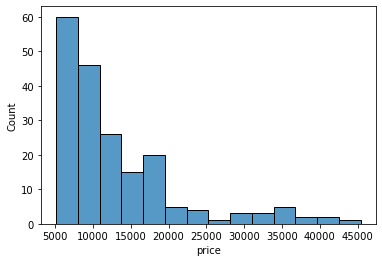

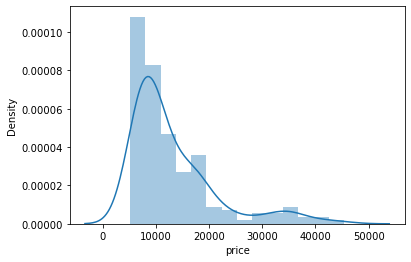

In [93]:
for col in car_num:
    print('Skewness of column {} : {}'.format(col,car_num[col].skew()))
    print("Histogram:" ,col)
    sns.histplot(car_num[col])
    plt.show()
    sns.distplot(car_num[col])
    plt.show()
    

In [94]:
# Before apply transformation of skew column , first check correlation between each and every munerical
# type input with output
# In this dataset, output means target  : Price

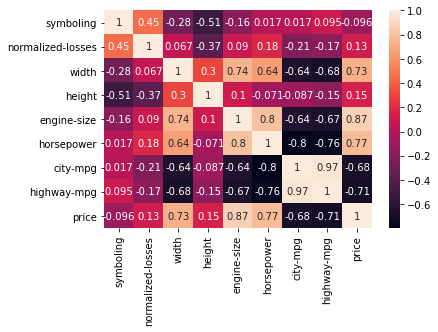

In [95]:
sns.heatmap(car_num.corr(),annot=True)
plt.show()

In [96]:
for col in car_num:
    print(col)
    print(car_num[col].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized-losses
[122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 137. 101.  78.
 106.  85. 107. 145. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65.  94. 256.  95.]
width
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.2 68.9
 68.8]
height
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 52.6
 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5 58.7
 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.2 50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5]
engine-size
[130 152 109 136 131 108 164 209  61  90  98 122  92  79 110 111 119 258
 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203 132
 121 146 141 173 145]
horsepower
[111.         154.         1

# we saw : - 
 good correlation width,engine-size,horsepower,city-mpg,highway-mpg with
target variable price and also find skewness in this column but we will not 
apply transformation to reduce skewness .
but bad correlation between symboling and normalised-losses with price and 
also find skewness in those column so apply transformation to reduce skewness
and the skewness of height is close to zero so not apply transformation 
in this column 

In [97]:
#There are 2 types of transformation to reduce skewness
# 1. sqrt()    2. log( )
#call this method with the help of numpy library.
#Rule : -
np.sqrt(-1)

nan

In [98]:
# apply sqrt() transfromation on normalized losses to reduce the skewness permanently
car_num['normalized-losses']=np.log(car_num['normalized-losses'])

In [99]:
# Check the skewness of car_num['normalized-losses'] column after 
car_num['normalized-losses'].skew()

0.020836595504623242

### Finally we concatenate of 2 DataFrame car_num and car_cat hold in  new DataFrame    car_new : use concat()  : inbuilt function of pandas 

In [100]:
car_new=pd.concat([car_num,car_cat],axis=1)
car_new
# Concatenate means to join 2 or more DataFrame
# Join column wise means axis=1

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,4.804021,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,4.804021,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,4.804021,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,5.099866,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,5.099866,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,68.9,55.5,141,114.0,23,28,16845,21,1,3,2,0,3
201,-1,4.553877,68.8,55.5,141,160.0,19,25,19045,21,1,3,2,0,3
202,-1,4.553877,68.9,55.5,173,134.0,18,23,21485,21,1,3,2,0,5
203,-1,4.553877,68.9,55.5,145,106.0,26,27,22470,21,0,3,2,0,3


In [101]:
car_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,4.804021,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,4.804021,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,4.804021,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,5.099866,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,5.099866,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [102]:
car_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   width              193 non-null    float64
 3   height             193 non-null    float64
 4   engine-size        193 non-null    int64  
 5   horsepower         193 non-null    float64
 6   city-mpg           193 non-null    int64  
 7   highway-mpg        193 non-null    int64  
 8   price              193 non-null    int64  
 9   make               193 non-null    int32  
 10  fuel-type          193 non-null    int32  
 11  body-style         193 non-null    int32  
 12  drive-wheels       193 non-null    int32  
 13  engine-location    193 non-null    int32  
 14  engine-type        193 non-null    int32  
dtypes: float64(4), int32(6), int64(5)
memory usage: 23.7 KB


# Step 4.) Scaling
     Scaling means unit of all the columns should be same, so apply scaling on column in given    dataset 
    For example :
             n1=1000 meter here unit : meter of variable n1
             n2=20 km      here unit : Kilo- meter of variable n2
             
             1 km = 1000 meter 
             20 km = 1000 * 20 = 20000 meter
             n2= 20000m
             n1 > n2

In [103]:
n1=1000 #  unit : m
n2 = 20 # unit : km
n2= 1000 * n2
if n1 > n2:
    print("n1 is greater : ",n1)
else:
    print("n2 is greater : ",n2)

n2 is greater :  20000


###  There are two types of methods :
     1. MinMaxScaler  : Normalization
     2. StandardScaler : Standardization
     
     
#### Mostly we are use StandardScaler Method, why? because values are under 0s and 1s

## 1. MinMaxScaler : 
      Formula of MinMaxScaler  = (X-min(X)) / (Max(X) - min(X))

In [105]:
car_new

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,4.804021,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,4.804021,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,4.804021,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,5.099866,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,5.099866,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,68.9,55.5,141,114.0,23,28,16845,21,1,3,2,0,3
201,-1,4.553877,68.8,55.5,141,160.0,19,25,19045,21,1,3,2,0,3
202,-1,4.553877,68.9,55.5,173,134.0,18,23,21485,21,1,3,2,0,5
203,-1,4.553877,68.9,55.5,145,106.0,26,27,22470,21,0,3,2,0,3


## 2.) StandardScaler Method
       Standard Scaler work on Z-SCORE FORMULA
       Formula of Z-SCORE= (X-mean(X)/Standard Deviation(X))
       Use this formula then value can be +ve or -ve or Zero any means this method is best 
       for scaling means almost use standardization mean standard scaler method

####  Apply standardscaler on whole dataset car_new

In [108]:
from sklearn.preprocessing import StandardScaler
# StandardScaler inbuilt class which define in sklearn.preprocessing

In [109]:
for col in car_new:
    # Create  an obejcts of standardScaler class
    ss=StandardScaler()
    car_new[col]=ss.fit_transform(car_new[[col]])  # Change Permanent
    #fit_transform() inbuilt method of StandardScaler Class

In [110]:
car_new.head(10)

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.867513,0.146538,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.050194,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277
1,1.867513,0.146538,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.422324,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277
2,0.187187,0.146538,-0.178224,-0.591990,0.631937,1.321612,-0.987075,-0.731505,0.422324,-1.930113,0.34001,-0.752016,1.229517,-0.125656,1.938242
3,1.027350,1.312799,0.141538,0.188602,-0.392369,-0.005357,-0.221378,-0.148717,0.106540,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366
4,1.027350,1.312799,0.232898,0.188602,0.250800,0.326386,-1.140215,-1.314294,0.539969,-1.771124,0.34001,0.427976,-2.365889,-0.125656,-0.078366
5,1.027350,0.146538,0.187218,-0.304403,0.250800,0.198792,-0.987075,-0.877202,0.267528,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366
6,0.187187,1.165871,2.516912,0.763776,0.250800,0.198792,-0.987075,-0.877202,0.572167,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366
7,0.187187,0.146538,2.516912,0.763776,0.250800,0.198792,-0.987075,-0.877202,0.722010,-1.771124,0.34001,1.607969,-0.568186,-0.125656,-0.078366
8,0.187187,1.165871,2.516912,0.845943,0.131695,0.964351,-1.293354,-1.605688,1.335622,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366
9,-0.652977,0.146538,0.918102,-0.756325,0.131695,1.474724,-1.446494,-1.314294,-0.134943,-1.771124,0.34001,-0.752016,-2.365889,-0.125656,-0.078366


# Step 5.) Feature Engineering 
        Feature Engineering means to add new columns according to requirement in existing dataset.

In [111]:
car_new['Area']=car_new['width']*car_new['height']

In [112]:
car_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,Area
0,1.867513,0.146538,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.050194,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277,1.693561
1,1.867513,0.146538,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.422324,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277,1.693561
2,0.187187,0.146538,-0.178224,-0.591990,0.631937,1.321612,-0.987075,-0.731505,0.422324,-1.930113,0.34001,-0.752016,1.229517,-0.125656,1.938242,0.105507
3,1.027350,1.312799,0.141538,0.188602,-0.392369,-0.005357,-0.221378,-0.148717,0.106540,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366,0.026694
4,1.027350,1.312799,0.232898,0.188602,0.250800,0.326386,-1.140215,-1.314294,0.539969,-1.771124,0.34001,0.427976,-2.365889,-0.125656,-0.078366,0.043925
